In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sn

c:\Users\karol\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
data = pd.read_pickle(r".\data\Sales.p")

In [16]:
data.head()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380
4,4,709,3,2014-01-22,1477,1,1,0,0,11647


In [17]:
data[data["Open"]==0]

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
17,18,614,7,2014-08-31,0,0,0,0,0,0
21,23,437,4,2013-12-26,0,0,0,c,1,0
37,40,170,7,2013-06-16,0,0,0,0,0,0
40,43,1088,1,2015-05-25,0,0,0,a,0,0
48,52,294,1,2015-04-06,0,0,0,b,1,0
...,...,...,...,...,...,...,...,...,...,...
640809,712010,612,7,2015-05-24,0,0,0,0,0,0
640817,712019,322,7,2014-03-23,0,0,0,0,0,0
640819,712022,205,7,2013-04-14,0,0,0,0,0,0
640820,712024,549,7,2015-03-01,0,0,0,0,0,0


In [4]:
data.dtypes

True_index              int64
Store_ID                int64
Day_of_week             int64
Date                   object
Nb_customers_on_day     int64
Open                    int64
Promotion               int64
State_holiday          object
School_holiday          int64
Sales                   int64
dtype: object

In [5]:
data.isnull().sum()

True_index             0
Store_ID               0
Day_of_week            0
Date                   0
Nb_customers_on_day    0
Open                   0
Promotion              0
State_holiday          0
School_holiday         0
Sales                  0
dtype: int64

In [6]:
data["Holiday_Encoded"] = np.where(data["State_holiday"] != '0', 1, 0)

In [7]:
data["Holiday_Encoded"].unique()

array([0, 1])

In [8]:
def convert_date(date):
    return dt.strptime(date,'%Y-%M-%d').toordinal()
data['Date'] = data['Date'].apply(convert_date)

In [9]:
data.dtypes

True_index              int64
Store_ID                int64
Day_of_week             int64
Date                    int64
Nb_customers_on_day     int64
Open                    int64
Promotion               int64
State_holiday          object
School_holiday          int64
Sales                   int64
Holiday_Encoded         int32
dtype: object

In [10]:
data.to_pickle(r".\data\Sales_Clean.p")

In [11]:
data

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales,Holiday_Encoded
0,0,625,3,734874,641,1,1,0,0,7293,0
1,1,293,2,734884,877,1,1,0,1,7060,0
2,2,39,4,735256,561,1,1,0,0,4565,0
3,3,676,4,734894,1584,1,1,0,0,6380,0
4,4,709,3,735255,1477,1,1,0,0,11647,0
...,...,...,...,...,...,...,...,...,...,...,...
640835,712040,674,6,735253,611,1,0,0,0,4702,0
640836,712041,1014,4,735613,1267,1,1,0,0,12545,0
640837,712042,135,6,735618,595,1,0,0,0,5823,0
640838,712043,810,1,735251,599,1,1,0,1,7986,0


In [12]:
data.corr()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,School_holiday,Sales,Holiday_Encoded
True_index,1.000000,-0.001098,-0.000831,-0.000037,-0.000932,0.000083,-0.001569,-0.000319,-0.000880,0.000245
Store_ID,-0.001098,1.000000,0.000329,-0.000199,0.023605,-0.001108,-0.000364,-0.000706,0.004804,0.000503
Day_of_week,-0.000831,0.000329,1.000000,0.002807,-0.385616,-0.527947,-0.392736,-0.206069,-0.461107,-0.053206
Date,-0.000037,-0.000199,0.002807,1.000000,-0.002756,-0.000105,0.021188,-0.036102,0.022151,0.003489
Nb_customers_on_day,-0.000932,0.023605,-0.385616,-0.002756,1.000000,0.617264,0.315858,0.071085,0.894872,-0.227339
Open,0.000083,-0.001108,-0.527947,-0.000105,0.617264,1.000000,0.294936,0.085213,0.678463,-0.379613
Promotion,-0.001569,-0.000364,-0.392736,0.021188,0.315858,0.294936,1.000000,0.066565,0.451819,-0.012813
School_holiday,-0.000319,-0.000706,-0.206069,-0.036102,0.071085,0.085213,0.066565,1.000000,0.084484,0.149864
Sales,-0.000880,0.004804,-0.461107,0.022151,0.894872,0.678463,0.451819,0.084484,1.000000,-0.254896
Holiday_Encoded,0.000245,0.000503,-0.053206,0.003489,-0.227339,-0.379613,-0.012813,0.149864,-0.254896,1.000000


C:\Users\karol\AppData\Local\Temp\ipykernel_5764\1498079706.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


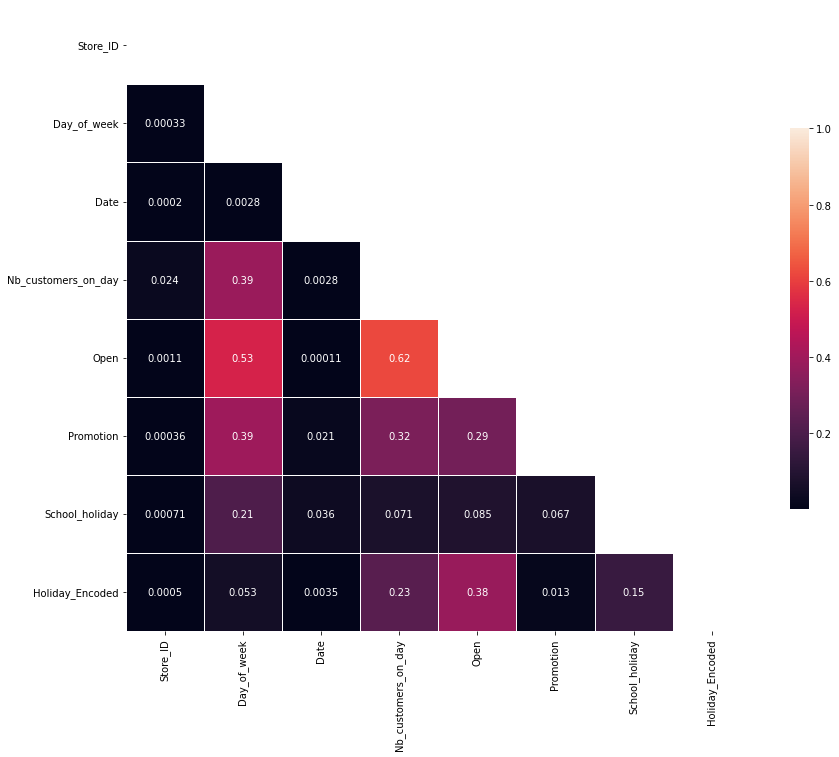

In [13]:
features = data.drop(["True_index","State_holiday","Sales"], axis=1)
corr=np.abs(features.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales,Holiday_Encoded
17,18,614,7,735264,0,0,0,0,0,0,0
21,23,437,4,734894,0,0,0,c,1,0,1
37,40,170,7,734884,0,0,0,0,0,0,0
40,43,1088,1,735623,0,0,0,a,0,0,1
48,52,294,1,735604,0,0,0,b,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
640809,712010,612,7,735622,0,0,0,0,0,0,0
640817,712019,322,7,735256,0,0,0,0,0,0,0
640819,712022,205,7,734882,0,0,0,0,0,0,0
640820,712024,549,7,735599,0,0,0,0,0,0,0
